In [1]:
# main.py

from HybridCloud import *

PRINTLOG = False
# Devices
ibm_kawasaki = IBM_Kawasaki(env=None, name="QPU-1", printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="QPU-2", printlog = PRINTLOG)
cpu1 = CPU("CPU-1", env=None)
cpu2 = CPU("CPU-2", env=None)

# Hybrid environment
sim_env = HybridCloudSimEnv(
    qpu_devices = [ibm_kawasaki, ibm_kyiv],
    cpu_devices = [cpu1, cpu2],
    broker_class = HybridBroker,
    job_feed_method = 'dispatcher',
    file_path = 'synth_job_batches/1000-job.csv', 
    job_generation_model = None, 
    printlog = PRINTLOG, 
    cost_config = None
)

sim_env.run()

0.00: SIMULATION STARTED
1097.32: SIMULATION ENDED
Number of jobs processed: 1000


#### Simpliest Example with one QPU node and one CPU node in a hybrid cloud. 

In [2]:
# from viz import plot_all

job_records = sim_env.job_records_manager.get_job_records()
# plot_all(job_records)

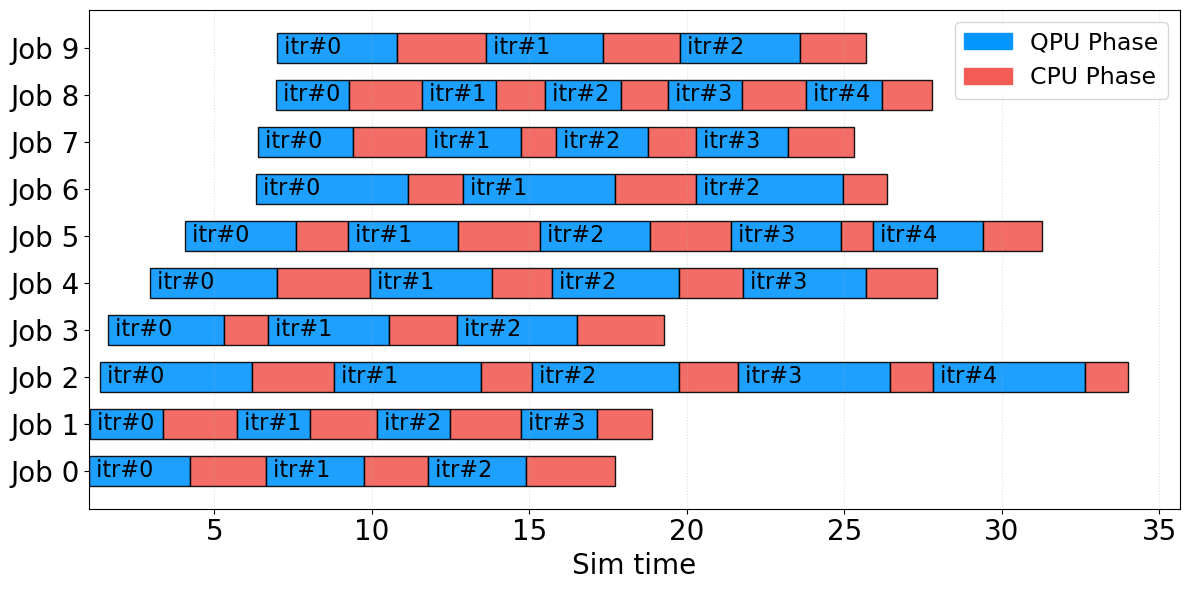

<Figure size 640x480 with 0 Axes>

In [3]:
first_ten = dict(list(job_records.items())[:10])
plot_all(first_ten, 10)
plt.savefig("results/job_phases.png", dpi=300, bbox_inches="tight")

In [4]:
results = calculate_device_usage_units(job_records, sim_env)
print(results)

{'time': 1097.32, 'qpu_util_percent': 78.12, 'cpu_util_percent': 31.81, 'mem_bw_util_percent': 45.32, 'qpu_units_time': 217745.47, 'cpu_units_time': 69807.71, 'mem_bw_time': 198925.77, 'qpu_units_capacity': 254, 'cpu_units_capacity': 200, 'mem_bw_capacity': 400}


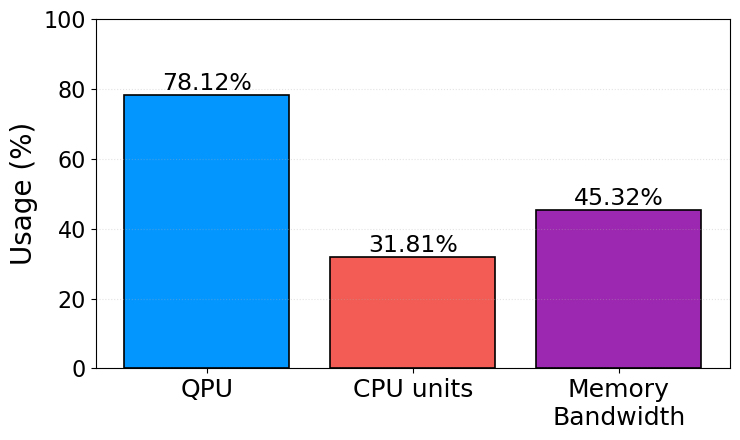

<Figure size 640x480 with 0 Axes>

In [5]:
plot_hybrid_utilization(results)
plt.savefig("results/usage.png", dpi=300, bbox_inches="tight")

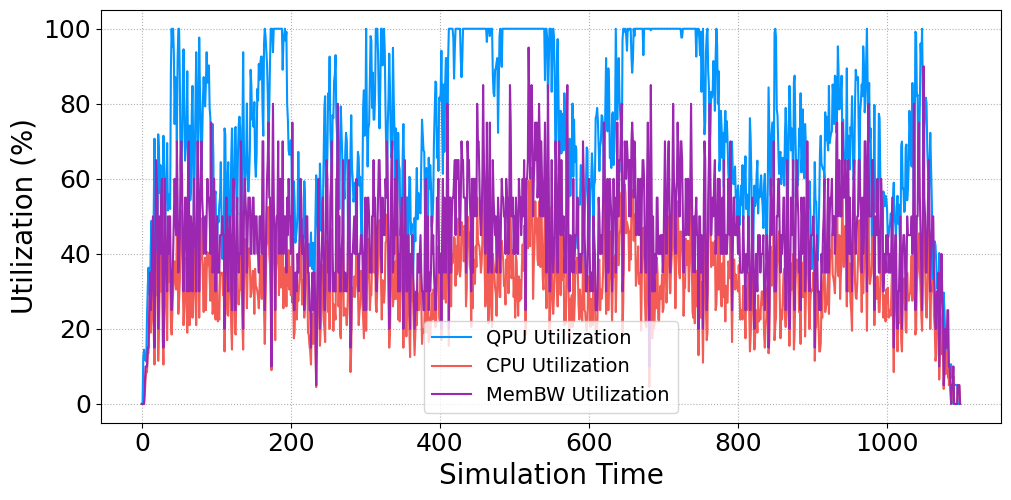

<Figure size 640x480 with 0 Axes>

In [6]:
time_points, qpu_util, cpu_util, mem_util = utilization_time_series(job_records, 256, 200, 400, step = 1.0)
plot_utilization_over_time(time_points, qpu_util, cpu_util, mem_util)
plt.savefig("results/usage_timeline.png", dpi=300, bbox_inches="tight")

In [7]:
# main.py

from HybridCloud import *

PRINTLOG = True
# Devices
ibm_kawasaki = IBM_Kawasaki(env=None, name="QPU-1", printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="QPU-2", printlog = PRINTLOG)
cpu1 = CPU("CPU-1", env=None)
cpu2 = CPU("CPU-2", env=None)

# Hybrid environment
sim_env = HybridCloudSimEnv(
    qpu_devices = [ibm_kawasaki, ibm_kyiv],
    cpu_devices = [cpu1, cpu2],
    broker_class = HybridBroker,
    job_feed_method = 'dispatcher',
    file_path = 'synth_job_batches/1-job.csv', 
    job_generation_model = None, 
    printlog = PRINTLOG
)

sim_env.run()

0.00: SIMULATION STARTED
1.00: Job 0 requires 6 qubits; QPU-1 has 127/127 free
1.00: Job 0 processing on qpu
1.00: QPU-1 received Job 0 requiring 6 qubits. 127 qubits remains
1.00: Job 0 will take 0.4023 sim-mins on QPU-1.
1.40: Job 0 completed on QPU-1.
1.40: Job 0 finished processing on qpu
3.80: Job 0 ITERATION 1/2 complete
3.80: Job 0 requires 6 qubits; QPU-1 has 127/127 free
3.80: Job 0 processing on qpu
3.80: QPU-1 received Job 0 requiring 6 qubits. 127 qubits remains
3.80: Job 0 will take 0.4023 sim-mins on QPU-1.
4.20: Job 0 completed on QPU-1.
4.20: Job 0 finished processing on qpu
6.86: Job 0 ITERATION 2/2 complete
6.86: Job 0 MAKESPAN=5.8595
Jobs processed: [0]
6.86: SIMULATION ENDED
Number of jobs processed: 1


In [8]:
rec = sim_env.job_records_manager.get_job_records()

print("QPU time (s):", rec[0]["qpu_time_s"])
print("CPU time (s):", rec[0]["cpu_time_s"])
print("Energy (kWh):", rec[0]["energy_total_kwh"])
print("Cost ($):", rec[0]["cost_energy_total"])

QPU time (s): 0.8046
CPU time (s): 5.0549
Energy (kWh): 0.0119
Cost ($): 0.0018


In [9]:
rec

{0: {'arrival': [1.0],
  'qpu_start': [1.0, 3.8016],
  'devc_name': ['QPU-1', 'CPU-1', 'QPU-1', 'CPU-1'],
  'qpu_arrive': [1.0, 3.8016],
  'qpu_units': [6, 6],
  'qpu_finish': [1.4023, 4.2039],
  'qpu_wait': [0.0, 0.0],
  'qpu_svc': [0.4023, 0.4023],
  'qpu_turn': [0.4023, 0.4023],
  'cpu_start': [1.4023, 4.2039],
  'cpu_arrive': [1.4023, 4.2039],
  'cpu_units': [8, 6],
  'cpu_mem_bw': [20, 20],
  'cpu_finish': [3.8016, 6.8595],
  'cpu_wait': [0.0, 0.0],
  'cpu_svc': [2.3993, 2.6556],
  'cpu_turn': [2.3993, 2.6556],
  'makespan': [5.8595],
  'qpu_time_s': 0.8046,
  'cpu_time_s': 5.0549,
  'energy_qpu_kwh': 0.0112,
  'energy_cpu_kwh': 0.0007,
  'energy_total_kwh': 0.0119,
  'cost_energy_total': 0.0018,
  'qpu_segments': [{'device': 'QPU-1',
    'time_s': 0.4023,
    'energy_kwh': 0.0056,
    'power_kw': 50.0},
   {'device': 'QPU-1',
    'time_s': 0.4023,
    'energy_kwh': 0.0056,
    'power_kw': 50.0}],
  'cpu_segments': [{'device': 'CPU-1',
    'time_s': 2.3993,
    'energy_kwh': 0.000